## Perkenalan

Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

- Nama : Rizal Aditya
- Batch : 008

Dalam Karnel ini saya ingin memprediksi rating sebuah pemain di dalam game FIFA 22


## 2 - Import Library

In [1]:
# Import Library will needs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## 3 - Data Loading

In [2]:
# Import Dataset yang digunakan
data = pd.read_csv('https://raw.githubusercontent.com/danupurnomo/hacktiv8-exercises/main/P1W1D1PM%20-%20Machine%20Learning%20Problem%20Framing/Players%20-%20Fifa%202022%20-%20Simplified.csv')
# Copy dataset
data_ori = data.copy()
data

,Name,Age,Height,Weight,ValueEUR,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Overall
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65,93
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82,92
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75,91
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77,91
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53,48
19256,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44,48
19257,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56,48
19258,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51,48


In [3]:
# Rename Kolom
data.rename(columns={'ValueEUR': 'Price', 'Overall':'Rating'}, inplace=True)
data

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65,93
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82,92
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75,91
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77,91
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53,48
19256,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44,48
19257,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56,48
19258,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51,48


In [4]:
# Check dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19260 entries, 0 to 19259
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               19260 non-null  object
 1   Age                19260 non-null  int64 
 2   Height             19260 non-null  int64 
 3   Weight             19260 non-null  int64 
 4   Price              19260 non-null  int64 
 5   AttackingWorkRate  19260 non-null  object
 6   DefensiveWorkRate  19260 non-null  object
 7   PaceTotal          19260 non-null  int64 
 8   ShootingTotal      19260 non-null  int64 
 9   PassingTotal       19260 non-null  int64 
 10  DribblingTotal     19260 non-null  int64 
 11  DefendingTotal     19260 non-null  int64 
 12  PhysicalityTotal   19260 non-null  int64 
 13  Rating             19260 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 2.1+ MB


In [5]:
# check dataset
data.describe()

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
count,19260.000000,19260.000000,19260.000000,1.926000e+04,19260.000000,19260.000000,19260.000000,19260.000000,19260.0000,19260.000000,19260.000000
mean,25.184683,181.305036,74.950779,2.857652e+06,67.910228,53.535514,57.853323,63.028712,50.0581,64.676584,65.815628
std,4.737340,6.866151,7.066864,7.604532e+06,10.656453,13.813476,9.835494,9.704853,16.3888,9.626269,6.817297
min,16.000000,155.000000,49.000000,0.000000e+00,28.000000,18.000000,25.000000,26.000000,14.0000,29.000000,48.000000
25%,21.000000,176.000000,70.000000,4.750000e+05,62.000000,44.000000,52.000000,58.000000,35.0000,58.000000,62.000000
50%,25.000000,181.000000,75.000000,9.750000e+05,68.000000,56.000000,58.000000,64.000000,54.0000,66.000000,66.000000
75%,29.000000,186.000000,80.000000,2.000000e+06,75.000000,64.000000,65.000000,69.000000,63.0000,72.000000,70.000000
max,54.000000,206.000000,110.000000,1.940000e+08,97.000000,94.000000,93.000000,95.000000,91.0000,92.000000,93.000000


## 4 - Exploratory Data Analysis (EDA)

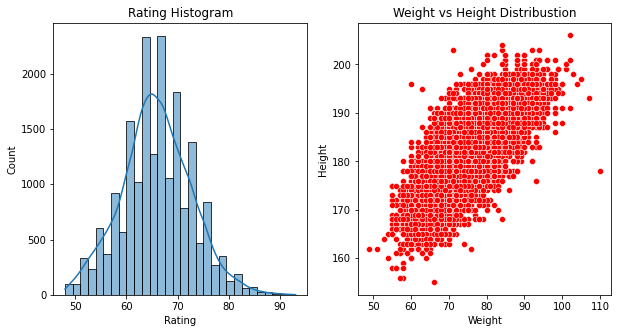

In [6]:
# Histogram

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data.Rating, bins=30, kde=True)
plt.title('Rating Histogram')

plt.subplot(1,2,2)
sns.scatterplot(data=data, x='Weight', y='Height', color='r')
plt.title('Weight vs Height Distribustion')
plt.show()


## 5 - Data Preprocessing

### Get Data Inference

In [7]:
# Get data for model inferene

data_inf = data.sample(10, random_state=17)
data_inf

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
9456,F. Berenguer,32,180,70,675000,High,Low,73,63,65,67,48,68,66
6380,Lasure,27,175,75,1500000,Medium,Medium,71,44,58,61,64,76,69
1970,G. Plata,20,178,65,9500000,High,Low,85,66,65,79,43,64,74
8012,D. Azcona,37,184,81,110000,Medium,Medium,67,63,67,68,47,69,67
13209,X. Dziekoński,17,188,78,1100000,Medium,Medium,62,64,62,63,33,65,63
4544,L. Reis,21,178,78,4200000,Medium,High,75,57,67,73,67,71,71
12638,A. Rojas,25,170,67,625000,High,Medium,73,61,55,66,39,48,63
13055,V. Ábrego,24,176,69,775000,Medium,Medium,62,64,49,66,40,57,63
13796,T. Baldé,19,182,68,900000,Medium,Medium,70,36,51,59,60,58,62
4641,J. Delgado,28,176,71,1600000,Medium,Medium,76,63,63,73,41,64,70


In [8]:
# Remove Inference Data from Dataset

data_train_test = data.drop(data_inf.index)

In [9]:
# Reset Index
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

In [10]:
# Display data_inf
data_inf

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
0,F. Berenguer,32,180,70,675000,High,Low,73,63,65,67,48,68,66
1,Lasure,27,175,75,1500000,Medium,Medium,71,44,58,61,64,76,69
2,G. Plata,20,178,65,9500000,High,Low,85,66,65,79,43,64,74
3,D. Azcona,37,184,81,110000,Medium,Medium,67,63,67,68,47,69,67
4,X. Dziekoński,17,188,78,1100000,Medium,Medium,62,64,62,63,33,65,63
5,L. Reis,21,178,78,4200000,Medium,High,75,57,67,73,67,71,71
6,A. Rojas,25,170,67,625000,High,Medium,73,61,55,66,39,48,63
7,V. Ábrego,24,176,69,775000,Medium,Medium,62,64,49,66,40,57,63
8,T. Baldé,19,182,68,900000,Medium,Medium,70,36,51,59,60,58,62
9,J. Delgado,28,176,71,1600000,Medium,Medium,76,63,63,73,41,64,70


### Spliting Dataset


In [11]:
# define 'X' and 'y'
X = data_train_test.drop(['Rating'], axis=1)
y = data_train_test['Rating']


In [12]:
# Splitting Dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=17)

print(X_train.shape)
print(X_test.shape)

(15400, 13)
(3850, 13)


### Features Selection

Personal judgment : Tidak ada hubungan antara `Name` dengan `Rating`, Olehkarena itu fitur name akan dihapus

In [13]:
# Drop kolom name

X_train.drop(['Name'], axis=1, inplace=True)
X_test.drop(['Name'], axis=1, inplace=True)

### Handling Outlier

Ini akan diajarkan di P1W1D2PM


### Handling Missing Values

Ini akan diajarkan di P1W1D2AM

In [14]:
X_train.isna().sum()

Age                  0
Height               0
Weight               0
Price                0
AttackingWorkRate    0
DefensiveWorkRate    0
PaceTotal            0
ShootingTotal        0
PassingTotal         0
DribblingTotal       0
DefendingTotal       0
PhysicalityTotal     0
dtype: int64

In [15]:
X_test.isna().sum()

Age                  0
Height               0
Weight               0
Price                0
AttackingWorkRate    0
DefensiveWorkRate    0
PaceTotal            0
ShootingTotal        0
PassingTotal         0
DribblingTotal       0
DefendingTotal       0
PhysicalityTotal     0
dtype: int64

In [16]:
y_train.isna().sum()

0

In [17]:
y_test.isna().sum()

0

### Splitting Columns (Numerical Columns and Categorical Columns)

In [18]:
# Numerical Columns
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
# Categorucal Columns
cat_columns = X_train.select_dtypes(include='object').columns.tolist()

print("Numerical Columns :", num_columns)
print("Categorical Columns :", cat_columns)

Numerical Columns : ['Age', 'Height', 'Weight', 'Price', 'PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']
Categorical Columns : ['AttackingWorkRate', 'DefensiveWorkRate']


In [19]:
# Split on X_train
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

#Split on X_test
X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

In [20]:
X_train_num

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
9235,19,186,74,1900000,63,50,61,61,65,64
4199,24,182,76,3800000,69,72,54,70,28,69
12940,20,186,77,1100000,63,69,51,67,21,54
8147,19,186,70,2600000,85,52,55,76,21,60
15074,32,197,93,160000,61,60,59,62,39,58
...,...,...,...,...,...,...,...,...,...,...
9529,28,190,82,0,49,32,45,47,69,59
406,25,174,72,28000000,86,75,73,86,32,62
13702,22,180,73,900000,64,55,60,68,49,60
2191,29,183,77,3500000,67,45,68,66,73,79


In [21]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler

# Initisasi Scaling
scaler = MinMaxScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num) # features numerical 'fit_transform'
X_test_num_scaled = scaler.transform(X_test_num) # features categorical 'transform'

In [22]:
X_train_num_scaled

array([[0.07894737, 0.60784314, 0.43103448, ..., 0.53030303, 0.66233766,
        0.55555556],
       [0.21052632, 0.52941176, 0.46551724, ..., 0.66666667, 0.18181818,
        0.63492063],
       [0.10526316, 0.60784314, 0.48275862, ..., 0.62121212, 0.09090909,
        0.3968254 ],
       ...,
       [0.15789474, 0.49019608, 0.4137931 , ..., 0.63636364, 0.45454545,
        0.49206349],
       [0.34210526, 0.54901961, 0.48275862, ..., 0.60606061, 0.76623377,
        0.79365079],
       [0.21052632, 0.60784314, 0.53448276, ..., 0.40909091, 0.64935065,
        0.73015873]])

In [23]:
# Feature Encoding
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)
X_train_cat_encoded

array([[2., 0.],
       [2., 2.],
       [0., 2.],
       ...,
       [2., 2.],
       [2., 2.],
       [1., 2.]])

### Concatenate between Numerical Columns and Categorical Columns


In [24]:
# Concate Data
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

In [25]:
# DataFrame Version
X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns + cat_columns])
X_train_final_df

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,AttackingWorkRate,DefensiveWorkRate
0,0.078947,0.607843,0.431034,0.009794,0.507246,0.421053,0.529412,0.530303,0.662338,0.555556,2.0,0.0
1,0.210526,0.529412,0.465517,0.019588,0.594203,0.710526,0.426471,0.666667,0.181818,0.634921,2.0,2.0
2,0.105263,0.607843,0.482759,0.005670,0.507246,0.671053,0.382353,0.621212,0.090909,0.396825,0.0,2.0
3,0.078947,0.607843,0.362069,0.013402,0.826087,0.447368,0.441176,0.757576,0.090909,0.492063,0.0,2.0
4,0.421053,0.823529,0.758621,0.000825,0.478261,0.552632,0.500000,0.545455,0.324675,0.460317,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15395,0.315789,0.686275,0.568966,0.000000,0.304348,0.184211,0.294118,0.318182,0.714286,0.476190,1.0,2.0
15396,0.236842,0.372549,0.396552,0.144330,0.840580,0.750000,0.705882,0.909091,0.233766,0.523810,0.0,1.0
15397,0.157895,0.490196,0.413793,0.004639,0.521739,0.486842,0.514706,0.636364,0.454545,0.492063,2.0,2.0
15398,0.342105,0.549020,0.482759,0.018041,0.565217,0.355263,0.632353,0.606061,0.766234,0.793651,2.0,2.0


## 6 - Model Definition

In [26]:
# Model Definition
from sklearn.linear_model import LinearRegression

model_lin_reg = LinearRegression()

## 7 - Model Training

In [27]:
# Train
model_lin_reg.fit(X_train_final, y_train)

LinearRegression()

## 8 - Model Evaluation

In [28]:
# Model Evaluation

## Predict Error on Train-Set and Test-Set
y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)

## Evaluation of Errors
from sklearn.metrics import mean_squared_error

print('Error Train-Set : ', mean_squared_error(y_train, y_pred_train))
print('Error Test-Set  : ', mean_squared_error(y_test, y_pred_test))

Error Train-Set :  8.917780461896871
Error Test-Set  :  8.757108979655305


## 9 - Model Inference

In [29]:
data_inf

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
0,F. Berenguer,32,180,70,675000,High,Low,73,63,65,67,48,68,66
1,Lasure,27,175,75,1500000,Medium,Medium,71,44,58,61,64,76,69
2,G. Plata,20,178,65,9500000,High,Low,85,66,65,79,43,64,74
3,D. Azcona,37,184,81,110000,Medium,Medium,67,63,67,68,47,69,67
4,X. Dziekoński,17,188,78,1100000,Medium,Medium,62,64,62,63,33,65,63
5,L. Reis,21,178,78,4200000,Medium,High,75,57,67,73,67,71,71
6,A. Rojas,25,170,67,625000,High,Medium,73,61,55,66,39,48,63
7,V. Ábrego,24,176,69,775000,Medium,Medium,62,64,49,66,40,57,63
8,T. Baldé,19,182,68,900000,Medium,Medium,70,36,51,59,60,58,62
9,J. Delgado,28,176,71,1600000,Medium,Medium,76,63,63,73,41,64,70


In [30]:
# Split Numerical and Categorical Columns
data_inf_num = data_inf[num_columns]
data_inf_cat = data_inf[cat_columns]

In [31]:
# Feature Scaling and Feature Encoding
data_inf_num_scaled = scaler.transform(data_inf_num)
data_inf_cat_encoded = encoder.transform(data_inf_cat)

In [32]:
# Concatenation
data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis=1)


In [33]:
# Predict Model Inference
y_pred_inf = model_lin_reg.predict(data_inf_final)
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Ratings - Prediction'])
y_pred_inf

,Ratings - Prediction
0,69.322716
1,68.123269
2,71.517242
3,70.422103
4,62.666168
5,72.016785
6,61.816243
7,62.879710
8,61.632516
9,68.507348


In [34]:
# Concate to Original Inference-Set
pd.concat([data_inf, y_pred_inf], axis=1)

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating,Ratings - Prediction
0,F. Berenguer,32,180,70,675000,High,Low,73,63,65,67,48,68,66,69.322716
1,Lasure,27,175,75,1500000,Medium,Medium,71,44,58,61,64,76,69,68.123269
2,G. Plata,20,178,65,9500000,High,Low,85,66,65,79,43,64,74,71.517242
3,D. Azcona,37,184,81,110000,Medium,Medium,67,63,67,68,47,69,67,70.422103
4,X. Dziekoński,17,188,78,1100000,Medium,Medium,62,64,62,63,33,65,63,62.666168
5,L. Reis,21,178,78,4200000,Medium,High,75,57,67,73,67,71,71,72.016785
6,A. Rojas,25,170,67,625000,High,Medium,73,61,55,66,39,48,63,61.816243
7,V. Ábrego,24,176,69,775000,Medium,Medium,62,64,49,66,40,57,63,62.879710
8,T. Baldé,19,182,68,900000,Medium,Medium,70,36,51,59,60,58,62,61.632516
9,J. Delgado,28,176,71,1600000,Medium,Medium,76,63,63,73,41,64,70,68.507348


## 10 - Conclusion